# Fetching data from an API


### Parsing JSON data

Much of the data that you'll fetch from the web is packaged as JSON objects, or arrays/lists of JSON objects. JSON is analagous to Python dictionaries, however the keys will always be strings. The values can be strings, numbers, lists, and other JSON objects.

Carryout the following steps to load a **local** JSON file:

In [ ]:
import json

# use a context manager to open the file, before loding it with '.load()'
with open('data/blade-runner.json', 'r') as json_file:
    json_data = json.load(json_file)
    
print(type(json_data))
json_data

In [ ]:
# to print the key:value pairs
for key, value in json_data.items():
    print('{}:{}'.format(key, value))
    
# Print each key-value pair in json_data
# for k in json_data.keys():
#    print(k + ': ', json_data[k])

### Fetching data from an API

In [ ]:
import requests

base_url = 'http://www.omdbapi.com72bc447a/?'
api_key = '72bc447a'
query = 'the+social+network'
url = '{b}t={q}&apikey={k}'.format(b=base_url, k=api_key, q=query)

# make the request and catch the response
r = requests.get(url)

# response is a json string
# text = r.text

# decode json data from response to a pyhton dictionary
json_data = r.json()

for key, value in json_data.items():
    print('{}:{}'.format(key, value))
    

### Fetch data from the wiki api

Reference: https://www.mediawiki.org/wiki/API:Main_page

In [ ]:
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

### Authentication and fetching data from Twitter API

The Twitter API requires that you have an account, since the API requires authentication(previous APIs provided anonymous access).

To access the Twitter API, you'll need to:

1. create an account
2. create a twitter app
3. make note of the following settings(from the 'Keys and Access Tokens' tab):
    - `Consumer Key(API Key)`
    - `Consumer Secret(API Secret)`
    - `Access Token`
    - `Access Token Secret`
    
Twitter has a number of publically available APIs:

- `REST API` provides programmatic access to read and write Twitter data, .i.e. you can read and post tweets.
- `Streaming API` gives access to the global stream of tweets. Several endpoints are provided, .e.g. `public stream` for following specific users, topics or data mining, and a `user stream` containing all the data in a single user's view of Twitter.

References:

[Tweet object overview](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object)  
[Data mining Twitter](https://www.toptal.com/python/twitter-data-mining-using-python)  
[Tweepy Docs](https://tweepy.readthedocs.io/en/3.7.0/)  


### Using Tweepy to stream tweets

`Tweepy` is a Pyhton package that simplifies the process of streaming tweets from Twitter's API. It takes care of authentication, simply pass it the four authentication credentials mentioned above. In this exercise we have created some mock authentication credentials.

In [ ]:
import tweepy, json

access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
# define a twitter stream listerner class - fetches tweets and writes them to file
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w") # write to diff file

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [ ]:
# Create your Stream object with authentication by passing tweepy.Stream() 
# the authentication handler auth and the Stream listener
listener = MyStreamListener()
stream = tweepy.Stream(auth, listener) # stream object with authentication

In [ ]:
# To filter Twitter streams, pass to the track argument in stream.filter() a list containing the desired 
# keywords 'clinton', 'trump', 'sanders', and 'cruz'.
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

In [2]:
import json

# the twitter data is now saved to a file, you can explore it!
tweets_data = []
tweets_file = open('data/tweets.txt', 'r') # read from saved tweets

# read the tweets and store them in tweets_data
for line in tweets_file:
    tweet = json.loads(line) # each tweet is a dictionary
    tweets_data.append(tweet) # list of dictionaries

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dictionary
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


Now you have the Twitter data in a list of dictionaries, `tweets_data`, where each dictionary corresponds to a single `tweet`. Next, you're going to extract the text and language of each tweet. The text in a tweet, `t1`, is stored as the value `t1['text']`; similarly, the language is stored in `t1['lang']`. Your task is to build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

Use `pd.DataFrame()` to construct a DataFrame of tweet texts and languages; to do so, the first argument should be `tweets_data`, a list of dictionaries. The second argument to `pd.DataFrame()` is a **list of the keys you wish to have as columns**.

In [3]:
# load the data into pandas dataframe
import pandas as pd

df = pd.DataFrame(tweets_data, columns=['text', 'lang'])
df.head()

,text,lang
0,RT @bpolitics: .@krollbondrating's Christopher...,en
1,RT @HeidiAlpine: @dmartosko Cruz video found.....,en
2,Njihuni me Zonjën Trump !!! | Ekskluzive https...,et
3,Your an idiot she shouldn't have tried to grab...,en
4,RT @AlanLohner: The anti-American D.C. elites ...,en


Now that we have a dataframe of tweets, we're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. We have defined the following function `word_in_text()`, which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

In [9]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

We're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords

In [12]:
# the code currently increases the value of a keyword by 1 each time a 
# tweet (text row) mentioning the keyword is encountered

# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])
    
print([clinton, trump, sanders, cruz])

[9, 77, 6, 14]


Now that you have the number of tweets that each candidate was mentioned in, we can plot a bar chart of this data. We'll then construct a barplot of the data using `Seaborn`'s `.barplot()` method, passing it two arguments:

- a list of labels and
- a list containing the variables you wish to plot (clinton, trump and so on).

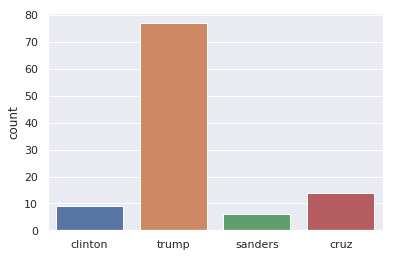

In [14]:
# the first argument should be the labels to appear on the x-axis; 
# the second argument should be the list of the variables you wish to plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()